# START

## Data Cleaning

### Imports

In [1]:
import numpy as np
import pandas as pd
import xlrd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [2]:
crash_data = pd.read_csv('/Users/javm/Desktop/Flatiron3/Traffic_Crashes_-_Vehicles.csv')

/Users/javm/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
crash_data

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337842,1428903,95bd4beb3fc74537b067a74e5fa3d3751e5d9b85366b70...,JF413122,09/17/2022 04:00:00 PM,2,DRIVER,NaN,1357945.0,NaN,HYUNDAI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337843,1428950,7330fac3b7ff58a70385bbc486f1b29b84bdf980f3b7f5...,JF413209,09/17/2022 06:30:00 AM,1,DRIVER,NaN,1358003.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337844,1428951,7330fac3b7ff58a70385bbc486f1b29b84bdf980f3b7f5...,JF413209,09/17/2022 06:30:00 AM,2,PARKED,NaN,1358007.0,NaN,JEEP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337845,1429660,9508aefdb2b41844fa8ba879d3089365f910868b5f30cd...,JF402263,09/17/2022 01:30:00 AM,1,DRIVER,NaN,1358680.0,NaN,JEEP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337847 entries, 0 to 1337846
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1337847 non-null  int64  
 1   CRASH_RECORD_ID           1337847 non-null  object 
 2   RD_NO                     1328848 non-null  object 
 3   CRASH_DATE                1337847 non-null  object 
 4   UNIT_NO                   1337847 non-null  int64  
 5   UNIT_TYPE                 1335974 non-null  object 
 6   NUM_PASSENGERS            198761 non-null   float64
 7   VEHICLE_ID                1307500 non-null  float64
 8   CMRC_VEH_I                24967 non-null    object 
 9   MAKE                      1307495 non-null  object 
 10  MODEL                     1307351 non-null  object 
 11  LIC_PLATE_STATE           1189340 non-null  object 
 12  VEHICLE_YEAR              1094573 non-null  float64
 13  VEHICLE_DEFECT            1

In [7]:
people_data = pd.read_csv('/Users/javm/Desktop/Flatiron3/Traffic_Crashes_-_People.csv')
people_data

/Users/javm/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (20,24,25,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440438,P316543,PASSENGER,0cf549b137f00c4c6a934aa900dc88694dbd24e560e250...,JF400046,1354784.0,09/17/2022 01:56:00 AM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440439,P316652,PASSENGER,bc722673c24222d6860059d0e07ad3da22107cea44b84d...,JF408037,1355339.0,09/17/2022 12:48:00 AM,5.0,CHICAGO,IL,60651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440440,P316770,PASSENGER,79d8ebaf30b5a1329ff256ac362025a420fe23cb46a4d1...,JF408754,1355718.0,09/17/2022 12:15:00 PM,2.0,CHICAGO,IL,60639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440441,P317147,PASSENGER,c43c6b9ebd9eef456b5628f6d2509b72f394ff798f6298...,JF411682,1357251.0,09/17/2022 05:56:00 PM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
people_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440443 entries, 0 to 1440442
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1440443 non-null  object 
 1   PERSON_TYPE            1440443 non-null  object 
 2   CRASH_RECORD_ID        1440443 non-null  object 
 3   RD_NO                  1430723 non-null  object 
 4   VEHICLE_ID             1412112 non-null  float64
 5   CRASH_DATE             1440443 non-null  object 
 6   SEAT_NO                292479 non-null   float64
 7   CITY                   1053018 non-null  object 
 8   STATE                  1066676 non-null  object 
 9   ZIPCODE                962017 non-null   object 
 10  SEX                    1418152 non-null  object 
 11  AGE                    1022515 non-null  float64
 12  DRIVERS_LICENSE_STATE  847046 non-null   object 
 13  DRIVERS_LICENSE_CLASS  719328 non-null   object 
 14  SAFETY_EQUIPMENT  

In [9]:
people_data['PERSON_TYPE'].value_counts()

DRIVER                 1120121
PASSENGER               292479
PEDESTRIAN               16334
BICYCLE                  10063
NON-MOTOR VEHICLE         1188
NON-CONTACT VEHICLE        258
Name: PERSON_TYPE, dtype: int64

### chitown_data

In [10]:
chitown_data = crash_data.merge(people_data, how = "outer" )

In [11]:
chitown_data

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618739,1428950,7330fac3b7ff58a70385bbc486f1b29b84bdf980f3b7f5...,JF413209,09/17/2022 06:30:00 AM,1,DRIVER,NaN,1358003.0,NaN,FORD,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1618740,1428951,7330fac3b7ff58a70385bbc486f1b29b84bdf980f3b7f5...,JF413209,09/17/2022 06:30:00 AM,2,PARKED,NaN,1358007.0,NaN,JEEP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1618741,1429660,9508aefdb2b41844fa8ba879d3089365f910868b5f30cd...,JF402263,09/17/2022 01:30:00 AM,1,DRIVER,NaN,1358680.0,NaN,JEEP,...,NaN,FOLLOWED TOO CLOSELY,NOT OBSCURED,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1618742,1429661,9508aefdb2b41844fa8ba879d3089365f910868b5f30cd...,JF402263,09/17/2022 01:30:00 AM,2,DRIVER,1.0,1358681.0,NaN,CHEVROLET,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [13]:
## Removing these values
values = ['EQUESTRIAN', 'DISABLED VEHICLE', 'NON-CONTACT VEHICLE']

In [14]:
chitown_data = chitown_data[chitown_data.UNIT_TYPE.isin(values) == False]

In [15]:
chitown_data['UNIT_TYPE'].replace('NON-MOTOR VEHICLE', 'BICYCLE', inplace = True)

/Users/javm/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### chitown_data1

In [16]:
# Drop columns with more than 95% of values missing
perc = 95.0
min_count =  int(((100-perc)/100)*chitown_data.shape[0] + 1)
chitown_data1 = chitown_data.dropna( axis=1, 
                thresh=min_count)

In [17]:
chitown_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618285 entries, 0 to 1618743
Data columns (total 55 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CRASH_UNIT_ID          1618285 non-null  int64  
 1   CRASH_RECORD_ID        1618285 non-null  object 
 2   RD_NO                  1607421 non-null  object 
 3   CRASH_DATE             1618285 non-null  object 
 4   UNIT_NO                1618285 non-null  int64  
 5   UNIT_TYPE              1616389 non-null  object 
 6   NUM_PASSENGERS         477047 non-null   float64
 7   VEHICLE_ID             1585528 non-null  float64
 8   MAKE                   1585522 non-null  object 
 9   MODEL                  1585346 non-null  object 
 10  LIC_PLATE_STATE        1460375 non-null  object 
 11  VEHICLE_YEAR           1355565 non-null  float64
 12  VEHICLE_DEFECT         1585528 non-null  object 
 13  VEHICLE_TYPE           1585528 non-null  object 
 14  VEHICLE_USE       

In [19]:
chitown_data1 = chitown_data1.drop(['AIRBAG_DEPLOYED','TOWED_I','TOWED_BY', 'TOWED_TO',
                                    'PERSON_ID', 'EJECTION','HOSPITAL', 'EMS_AGENCY'], axis = 1)

In [20]:
chitown_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618285 entries, 0 to 1618743
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CRASH_UNIT_ID          1618285 non-null  int64  
 1   CRASH_RECORD_ID        1618285 non-null  object 
 2   RD_NO                  1607421 non-null  object 
 3   CRASH_DATE             1618285 non-null  object 
 4   UNIT_NO                1618285 non-null  int64  
 5   UNIT_TYPE              1616389 non-null  object 
 6   NUM_PASSENGERS         477047 non-null   float64
 7   VEHICLE_ID             1585528 non-null  float64
 8   MAKE                   1585522 non-null  object 
 9   MODEL                  1585346 non-null  object 
 10  LIC_PLATE_STATE        1460375 non-null  object 
 11  VEHICLE_YEAR           1355565 non-null  float64
 12  VEHICLE_DEFECT         1585528 non-null  object 
 13  VEHICLE_TYPE           1585528 non-null  object 
 14  VEHICLE_USE       

### crash_df

In [21]:
crash_df = chitown_data1[['UNIT_TYPE', 'NUM_PASSENGERS', 'AGE', 'SEX', 'BAC_RESULT','VEHICLE_TYPE', 'MANEUVER', 'FIRST_CONTACT_POINT','DRIVER_ACTION', 'INJURY_CLASSIFICATION']]

In [22]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618285 entries, 0 to 1618743
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   UNIT_TYPE              1616389 non-null  object 
 1   NUM_PASSENGERS         477047 non-null   float64
 2   AGE                    1024721 non-null  float64
 3   SEX                    1420538 non-null  object 
 4   BAC_RESULT             1148548 non-null  object 
 5   VEHICLE_TYPE           1585528 non-null  object 
 6   MANEUVER               1585528 non-null  object 
 7   FIRST_CONTACT_POINT    1571655 non-null  object 
 8   DRIVER_ACTION          1147337 non-null  object 
 9   INJURY_CLASSIFICATION  1442231 non-null  object 
dtypes: float64(2), object(8)
memory usage: 135.8+ MB


### crash_df2

In [24]:
crash_df2 =crash_df.dropna(subset=['INJURY_CLASSIFICATION'])

In [25]:
rename2 = {"NO INDICATION OF INJURY" : 0, "NONINCAPACITATING INJURY" : 1, "REPORTED, NOT EVIDENT": 1, "INCAPACITATING INJURY" : 1, 'FATAL': 1}
crash_df2=crash_df2.replace({"INJURY_CLASSIFICATION": rename2})

In [26]:
crash_df2['INJURY_CLASSIFICATION'].value_counts(normalize = True)

0    0.914406
1    0.085594
Name: INJURY_CLASSIFICATION, dtype: float64

In [27]:
rename = {"TEST NOT OFFERED" : 0, "TEST REFUSED" : 0, "TEST TAKEN": 1, "TEST PERFORMED, RESULTS UNKNOWN" : 1}
crash_df2=crash_df2.replace({"BAC_RESULT": rename})

In [28]:
crash_df2 = crash_df2.fillna(crash_df2.max())

In [30]:
crash_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442231 entries, 0 to 1618743
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   UNIT_TYPE              1442088 non-null  object 
 1   NUM_PASSENGERS         1442231 non-null  float64
 2   AGE                    1442231 non-null  float64
 3   SEX                    1420416 non-null  object 
 4   BAC_RESULT             1442231 non-null  float64
 5   VEHICLE_TYPE           1411607 non-null  object 
 6   MANEUVER               1411607 non-null  object 
 7   FIRST_CONTACT_POINT    1399567 non-null  object 
 8   DRIVER_ACTION          1147280 non-null  object 
 9   INJURY_CLASSIFICATION  1442231 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 121.0+ MB


### crash_df3

In [31]:
crash_df3 = crash_df2.sample(n=50000)

In [32]:
crash_df2['INJURY_CLASSIFICATION'].value_counts(normalize = True)

0    0.914406
1    0.085594
Name: INJURY_CLASSIFICATION, dtype: float64

In [33]:
crash_df3['INJURY_CLASSIFICATION'].value_counts(normalize = True)

0    0.9153
1    0.0847
Name: INJURY_CLASSIFICATION, dtype: float64

In [34]:
crash_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 420686 to 379771
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNIT_TYPE              49996 non-null  object 
 1   NUM_PASSENGERS         50000 non-null  float64
 2   AGE                    50000 non-null  float64
 3   SEX                    49258 non-null  object 
 4   BAC_RESULT             50000 non-null  float64
 5   VEHICLE_TYPE           48846 non-null  object 
 6   MANEUVER               48846 non-null  object 
 7   FIRST_CONTACT_POINT    48447 non-null  object 
 8   DRIVER_ACTION          39919 non-null  object 
 9   INJURY_CLASSIFICATION  50000 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 4.2+ MB


## Pipelines

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer

In [36]:
X = crash_df3.drop('INJURY_CLASSIFICATION', axis = 1)
y = crash_df3['INJURY_CLASSIFICATION']

In [37]:
numeric_features = ["NUM_PASSENGERS", "AGE", "BAC_RESULT"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["UNIT_TYPE", "SEX", "VEHICLE_TYPE", "MANEUVER", "FIRST_CONTACT_POINT", "DRIVER_ACTION"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy ='constant', fill_value ='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [38]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(random_state=42))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.929


/Users/javm/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Base Model

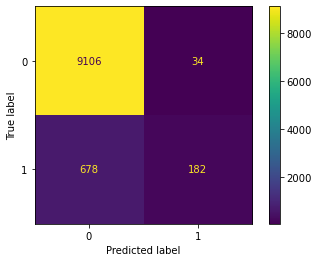

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

In [40]:
y_train.value_counts()

0    36625
1     3375
Name: INJURY_CLASSIFICATION, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE

Accuracy: 0.9288
Recall: 0.2116279069767442
Precision: 0.8425925925925926
F1 : 0.33828996282527884


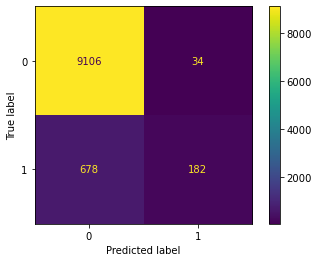

In [42]:
smote_y_pred = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,smote_y_pred)))
print("Recall: {}".format(recall_score(y_test,smote_y_pred)))
print("Precision: {}".format(precision_score(y_test,smote_y_pred)))
print("F1 : {}".format(f1_score(y_test,smote_y_pred)))
plot_confusion_matrix(clf,X_test,y_test)

## Random Forest

In [43]:
clf2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=42))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf2.fit(X_train, y_train)
print("model score: %.3f" % clf2.score(X_test, y_test))

model score: 0.907


Accuracy: 0.907
Recall: 0.2302325581395349
Precision: 0.4248927038626609
F1 : 0.29864253393665163


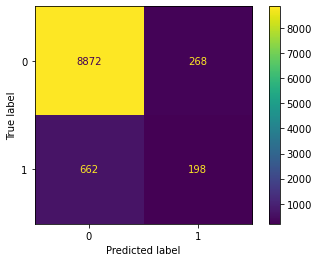

In [44]:
smote_y_pred = clf2.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,smote_y_pred)))
print("Recall: {}".format(recall_score(y_test,smote_y_pred)))
print("Precision: {}".format(precision_score(y_test,smote_y_pred)))
print("F1 : {}".format(f1_score(y_test,smote_y_pred)))
plot_confusion_matrix(clf2,X_test,y_test)

In [ ]:
y_pred = best_model.predict(X_test)

## RandomizedSearchCV

In [45]:
clf2 = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", RandomForestClassifier(random_state=42),)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf2.fit(X_train, y_train)
print("model score: %.3f" % clf2.score(X_test, y_test))

model score: 0.908


In [57]:
rf_params = {'classifier__n_estimators': [68, 72, 76],
             'classifier__min_samples_leaf': [1, 3, 5],
             'classifier__min_samples_split': [.32, .35, .38]}
rf_cv = RandomizedSearchCV(clf2, rf_params, cv = 5, scoring = 'recall', n_jobs = -1, refit = True)

rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['NUM_PASSENGERS',
                                                                                'AGE',
                                                                                'BAC_RESULT']),
                                                                              ('cat',

In [58]:
best_model = rf_cv.best_estimator_

In [59]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NUM_PASSENGERS', 'AGE',
                                                   'BAC_RESULT']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
  

In [49]:
#best_model try 1: max_depth=3,                     min_samples_split=0.35, n_estimators=65,
#best_model try 2: max_depth=4, min_samples_leaf=3, min_samples_split=0.35, n_estimators=70,
#best_model try 3: max_depth=6,                     min_samples_split=0.38, n_estimators=76,                                                                              

In [60]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NUM_PASSENGERS', 'AGE',
                                                   'BAC_RESULT']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
  

In [61]:
y_pred = best_model.predict(X_test)

In [75]:
best_model.score(X_train, y_train)

0.9288571428571428

In [73]:
recall_score 

0.19409937888198758

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     13712
           1       0.85      0.19      0.31      1288

    accuracy                           0.93     15000
   macro avg       0.89      0.59      0.64     15000
weighted avg       0.92      0.93      0.91     15000



## GridSearchCV

In [68]:
rf_params = {'classifier__n_estimators': [68, 72, 76],
             'classifier__min_samples_leaf': [1, 3, 5],
             'classifier__min_samples_split': [.32, .35, .38]}
gr_cv = GridSearchCV(clf2, rf_params, cv = 5, scoring = 'recall', n_jobs = -1, refit = True)

gr_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['NUM_PASSENGERS',
                                                                          'AGE',
                                                                          'BAC_RESULT']),
                                                                        ('cat',
                                                                 

In [69]:
best_model2 = gr_cv.best_estimator_

In [70]:
best_model2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NUM_PASSENGERS', 'AGE',
                                                   'BAC_RESULT']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
  

In [71]:
best_model2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NUM_PASSENGERS', 'AGE',
                                                   'BAC_RESULT']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
  

In [72]:
y_pred2 = best_model2.predict(X_test)

In [143]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     13712
           1       0.84      0.20      0.32      1288

    accuracy                           0.93     15000
   macro avg       0.88      0.60      0.64     15000
weighted avg       0.92      0.93      0.91     15000



In [82]:
gr_cv.best_params_

{'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 0.32,
 'classifier__n_estimators': 72}

In [188]:
feat_imp = best_model2['classifier'].feature_importances_

In [189]:
important = best_model2.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names(categorical_features)

print(important)


['UNIT_TYPE_BICYCLE' 'UNIT_TYPE_DRIVER' 'UNIT_TYPE_DRIVERLESS'
 'UNIT_TYPE_PARKED' 'UNIT_TYPE_PEDESTRIAN' 'UNIT_TYPE_missing' 'SEX_F'
 'SEX_M' 'SEX_X' 'SEX_missing' 'VEHICLE_TYPE_ALL-TERRAIN VEHICLE (ATV)'
 'VEHICLE_TYPE_AUTOCYCLE' 'VEHICLE_TYPE_BUS OVER 15 PASS.'
 'VEHICLE_TYPE_BUS UP TO 15 PASS.' 'VEHICLE_TYPE_FARM EQUIPMENT'
 'VEHICLE_TYPE_MOPED OR MOTORIZED BICYCLE'
 'VEHICLE_TYPE_MOTOR DRIVEN CYCLE' 'VEHICLE_TYPE_MOTORCYCLE (OVER 150CC)'
 'VEHICLE_TYPE_OTHER' 'VEHICLE_TYPE_OTHER VEHICLE WITH TRAILER'
 'VEHICLE_TYPE_PASSENGER' 'VEHICLE_TYPE_PICKUP'
 'VEHICLE_TYPE_SINGLE UNIT TRUCK WITH TRAILER'
 'VEHICLE_TYPE_SPORT UTILITY VEHICLE (SUV)'
 'VEHICLE_TYPE_TRACTOR W/ SEMI-TRAILER'
 'VEHICLE_TYPE_TRACTOR W/O SEMI-TRAILER'
 'VEHICLE_TYPE_TRUCK - SINGLE UNIT' 'VEHICLE_TYPE_UNKNOWN/NA'
 'VEHICLE_TYPE_VAN/MINI-VAN' 'VEHICLE_TYPE_missing'
 'MANEUVER_AVOIDING VEHICLES/OBJECTS' 'MANEUVER_BACKING'
 'MANEUVER_CHANGING LANES' 'MANEUVER_DIVERGING' 'MANEUVER_DRIVERLESS'
 'MANEUVER_DRIVING WRONG WAY

In [227]:
feature_imp_df = pd.DataFrame(feat_imp[:94], important[:94], columns = ['coefficents'])


feature_imp_df.reset_index(inplace = True)

feature_imp_df.rename(columns = {'index': 'feature_names'}, inplace = True)

feature_imp_df.sort_values(by = 'coefficents', ascending = True, inplace = True)

In [222]:
### Plotting feature coifficent

<AxesSubplot:xlabel='coefficents', ylabel='feature_names'>

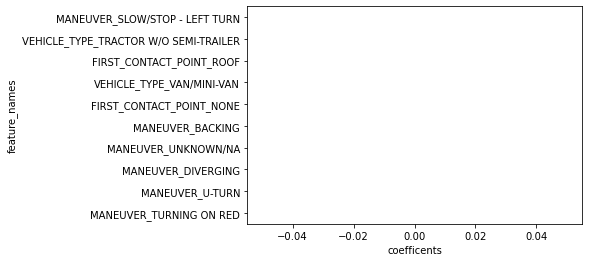

In [228]:
import seaborn as sns

sns.barplot(x = 'coefficents', y = 'feature_names', data = feature_imp_df[:10])

<AxesSubplot:xlabel='coefficents', ylabel='feature_names'>

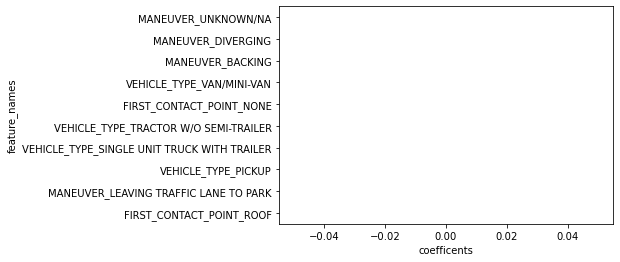

In [226]:
sns.barplot(x = 'coefficents', y = 'feature_names', data = feature_imp_df[:])

<AxesSubplot:>

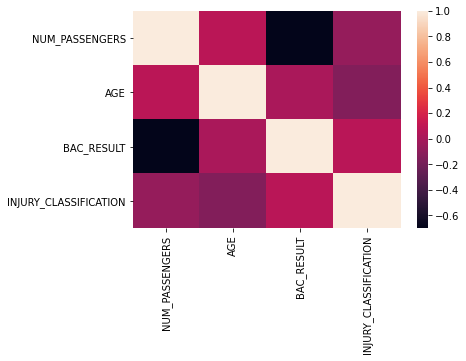

In [141]:
sns.heatmap(crash_df3.corr())

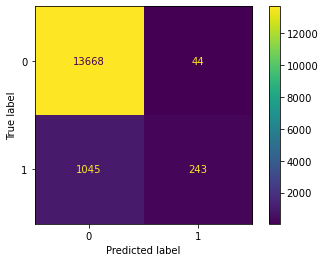

In [149]:
plot_confusion_matrix(best_model,X_test,y_test)

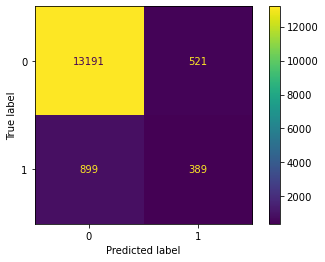

In [159]:
plot_confusion_matrix(newpipeline,X_test,y_test)

In [150]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [152]:
model = RandomForestClassifier(max_depth=12, n_estimators=40, random_state=25)
over = SMOTE(sampling_strategy=0.25)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('preprocess', preprocessor), ('over', over), ('under', under), ('model', model)]
newpipeline = Pipeline(steps=steps)
newpipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NUM_PASSENGERS', 'AGE',
                                                   'BAC_RESULT']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
    

In [153]:
newpipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NUM_PASSENGERS', 'AGE',
                                                   'BAC_RESULT']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
    

In [155]:
new_pred = newpipeline.predict(X_test)

In [156]:
print(classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13712
           1       0.43      0.30      0.35      1288

    accuracy                           0.91     15000
   macro avg       0.68      0.63      0.65     15000
weighted avg       0.89      0.91      0.90     15000

